Use the _exact_ mass MS2LDA on the alphabet data
===

In [1]:
import numpy as np
import pylab as plt
import pymzml
%matplotlib inline

%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/Users/simon/git/inklda/code/')
from lda import LDA


In [2]:
in_file = '/Users/simon/Dropbox/MS_Ink_Data/Alphabet/abcdefgh_1.mzML'

In [235]:
from lda import LDA_Feature_Extractor as LDAF
fe = LDAF(in_file,use_scans='all',min_intense=500.0,min_mass=100.0,max_mass=400.0,tol=200,
         min_doc_word_instances = 0,max_doc_word_instances = 1e5)
fe.make_corpus()
# fe.make_nominal_corpus()

Spectrum 100 (58 words)
Spectrum 200 (60 words)
Spectrum 300 (60 words)
Spectrum 400 (60 words)
Spectrum 500 (60 words)
Spectrum 600 (62 words)
Spectrum 700 (62 words)
Spectrum 800 (62 words)
Spectrum 900 (70 words)
Spectrum 1000 (85 words)
Spectrum 1100 (86 words)
Spectrum 1200 (97 words)
Spectrum 1300 (97 words)
Spectrum 1400 (97 words)
Spectrum 1500 (107 words)
Spectrum 1600 (126 words)
Spectrum 1700 (142 words)
Spectrum 1800 (144 words)
Spectrum 1900 (144 words)
Spectrum 2000 (145 words)
Spectrum 2100 (145 words)
Spectrum 2200 (145 words)
Spectrum 2300 (145 words)
Spectrum 2400 (145 words)
Spectrum 2500 (147 words)
Spectrum 2600 (148 words)
Spectrum 2700 (148 words)
Spectrum 2800 (148 words)
Spectrum 2900 (148 words)
Spectrum 3000 (148 words)
Spectrum 3100 (148 words)
Spectrum 3200 (150 words)
Spectrum 3300 (156 words)
Spectrum 3400 (157 words)
Spectrum 3500 (157 words)
Spectrum 3600 (157 words)
Spectrum 3700 (157 words)
Spectrum 3800 (159 words)
Spectrum 3900 (159 words)
Spectrum 

In [185]:
from ink_functions import ImagingGrid
ig = ImagingGrid(n_rows=8,width=62,drop=1.25,time_between_scans=0.63,n_scans=6327)

375.213150728
376.216800036
377.212492406
378.248278411
379.237788069
383.203809758
384.207647534
384.295543646
385.291852892
361.222251519
360.24344472
1000.34265137


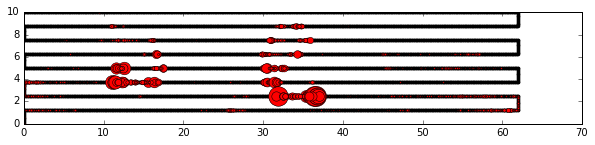

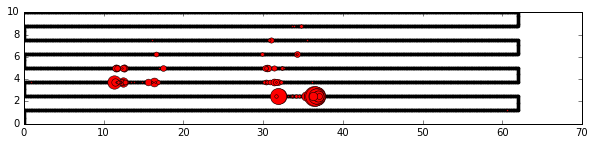

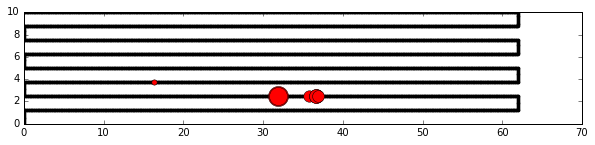

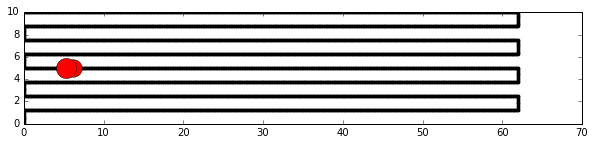

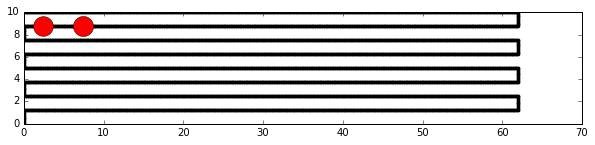

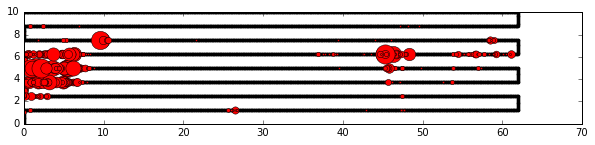

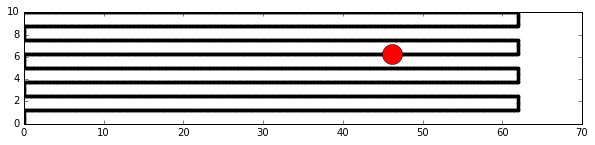

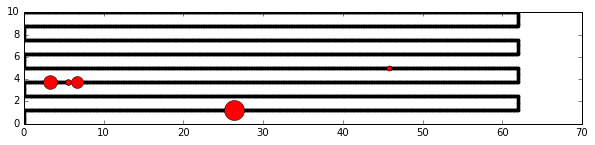

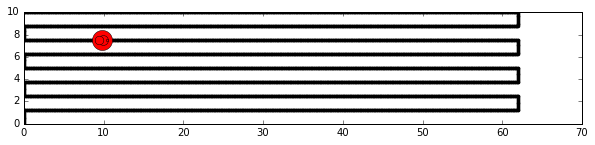

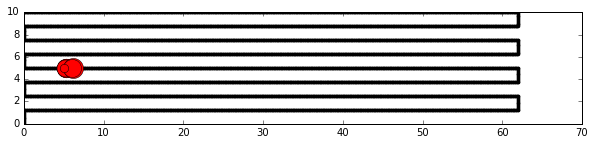

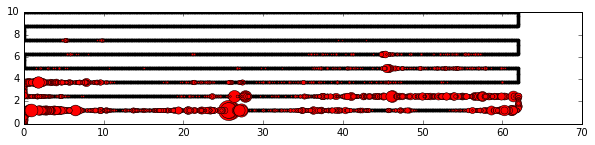

In [210]:
z = zip(fe.word_names,np.abs(375-np.array(fe.word_masses)))
z = sorted(z,key=lambda x:x[1])
count = 0
for w,d in z:
# w = z[1][0]
    print w
    nice = {}
    for doc in fe.corpus:
        if w in fe.corpus[doc]:
            nice[doc] = fe.corpus[doc][w]
    ig.plot(vals = nice,figsize=(10,2),max_marker_size=20)
    count += 1
    if count > 10:
        break
min_i = 1e10
for w in nice:
    if nice[w] < min_i:
        min_i = nice[w]
print min_i

In [241]:
from lda import VariationalLDA
v_lda = VariationalLDA(fe.corpus,K = 50)

Found 174 unique words
Object created with 6327 documents
Document - word matrix created
[[  609 72913  6328 ...,     0     0     0]
 [    0 71572 10554 ...,     0     0     0]
 [    0 55808  8657 ...,     0     0     0]
 ..., 
 [    0  7942     0 ...,     0     0     0]
 [    0  5530     0 ...,     0     0     0]
 [    0  7379     0 ...,     0     0     0]]


In [244]:
v_lda.run_vb(n_its = 200)

Initialising
Starting iterations
Iteration 0 (change = 84.7332584802)
Iteration 1 (change = 1.36535296145)
Iteration 2 (change = 2.4867911557)
Iteration 3 (change = 3.45799705274)
Iteration 4 (change = 4.11818812658)
Iteration 5 (change = 4.19231122384)
Iteration 6 (change = 3.7225297843)
Iteration 7 (change = 3.01296163536)
Iteration 8 (change = 2.39665799751)
Iteration 9 (change = 1.99214847893)
Iteration 10 (change = 1.71125607797)
Iteration 11 (change = 1.4878324344)
Iteration 12 (change = 1.31565254439)
Iteration 13 (change = 1.18094503786)
Iteration 14 (change = 1.07797468481)
Iteration 15 (change = 0.995095700622)
Iteration 16 (change = 0.935092043635)
Iteration 17 (change = 0.880506804431)
Iteration 18 (change = 0.832728559119)
Iteration 19 (change = 0.793793578365)
Iteration 20 (change = 0.758501710527)
Iteration 21 (change = 0.727617602184)
Iteration 22 (change = 0.700963667641)
Iteration 23 (change = 0.678656730679)
Iteration 24 (change = 0.657530029296)
Iteration 25 (change

376.21799893
14


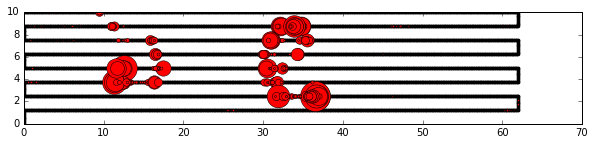

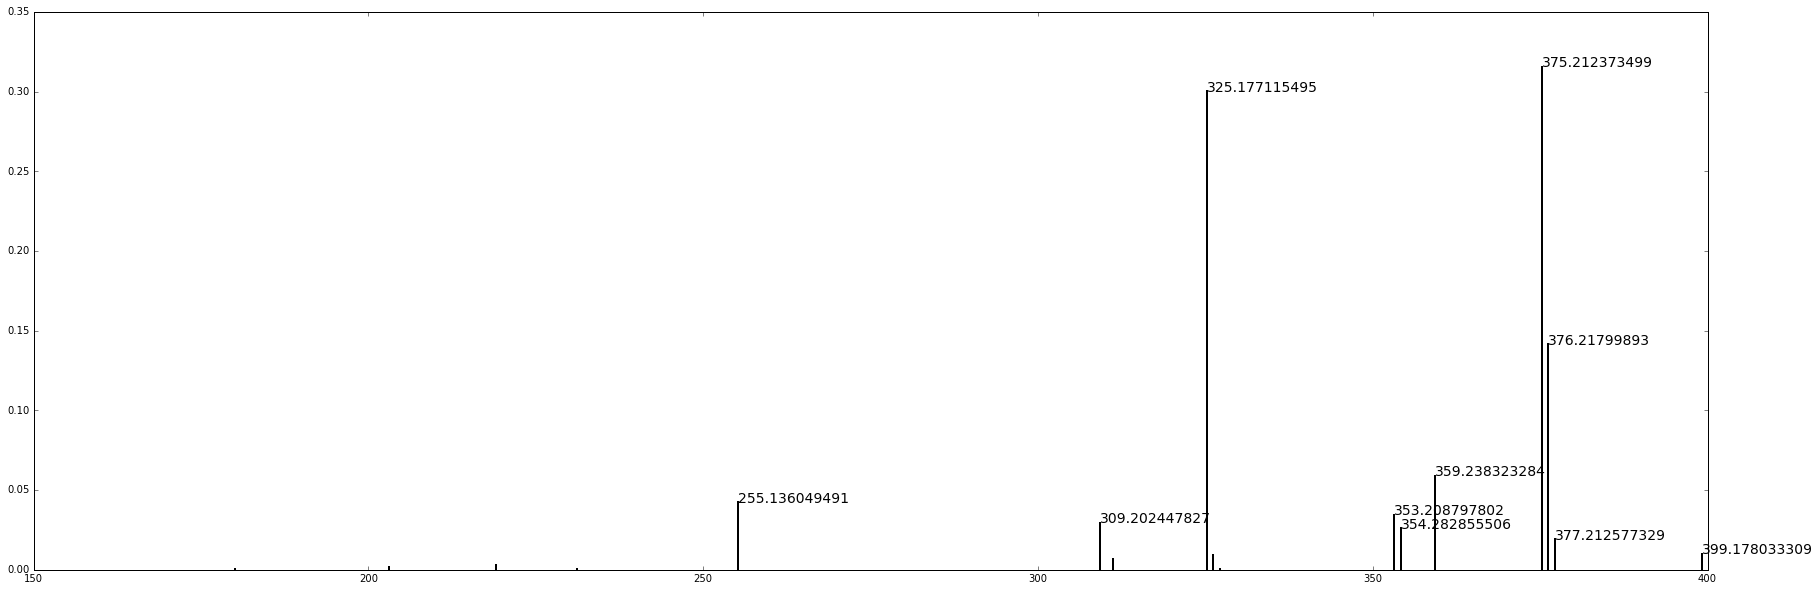

In [255]:
word_name = fe.word_names[np.abs(376-np.array(fe.word_masses)).argmin()]
print word_name
be = v_lda.get_beta()
word_pos = v_lda.word_index[word_name]
best_topic = be[:,word_pos].argmax()
print best_topic
ig.plot(vals = v_lda.get_topic_as_doc_dict(best_topic),figsize=(10,2),max_marker_size=30)
plt.savefig('be.png')
from ink_functions import plot_topic_dict
plot_topic_dict(v_lda.get_topic_as_dict(best_topic),label_thresh=0.01)
plt.savefig('be_spectrum.png')

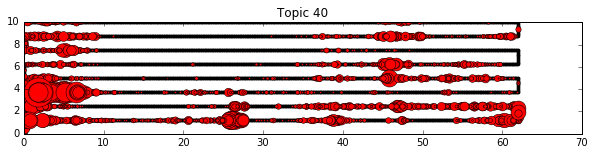

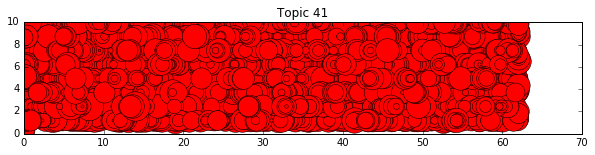

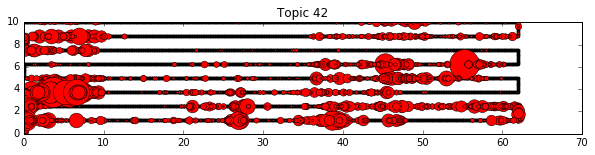

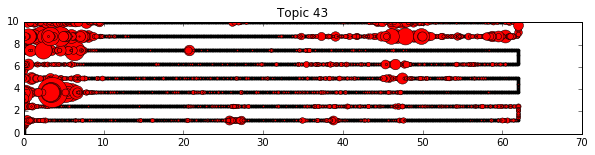

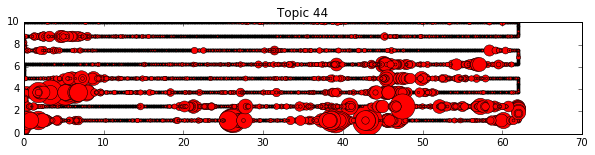

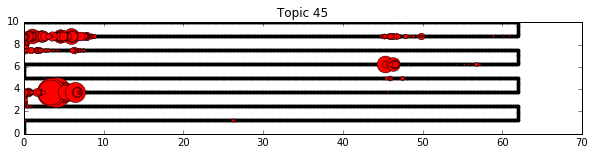

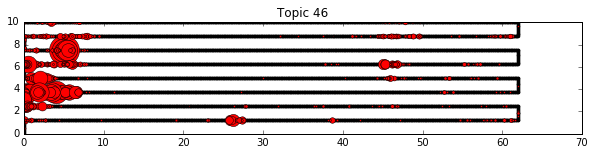

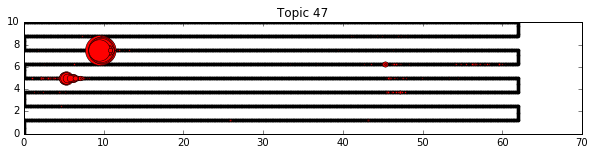

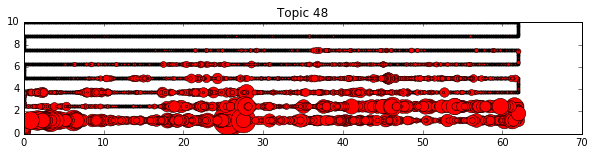

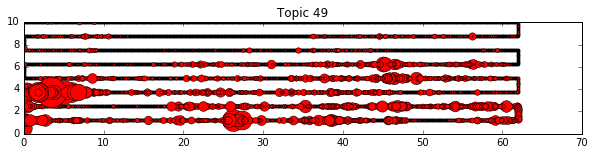

In [263]:
for k in range(40,50,1):
    ig.plot(vals=v_lda.get_topic_as_doc_dict(k),figsize=(10,2),max_marker_size=30)
    plt.title('Topic {}'.format(k))
#     plot_topic_dict(v_lda.get_topic_as_dict(k),label_thresh=0.02)

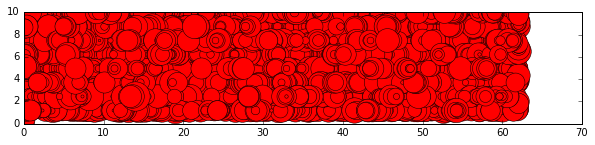

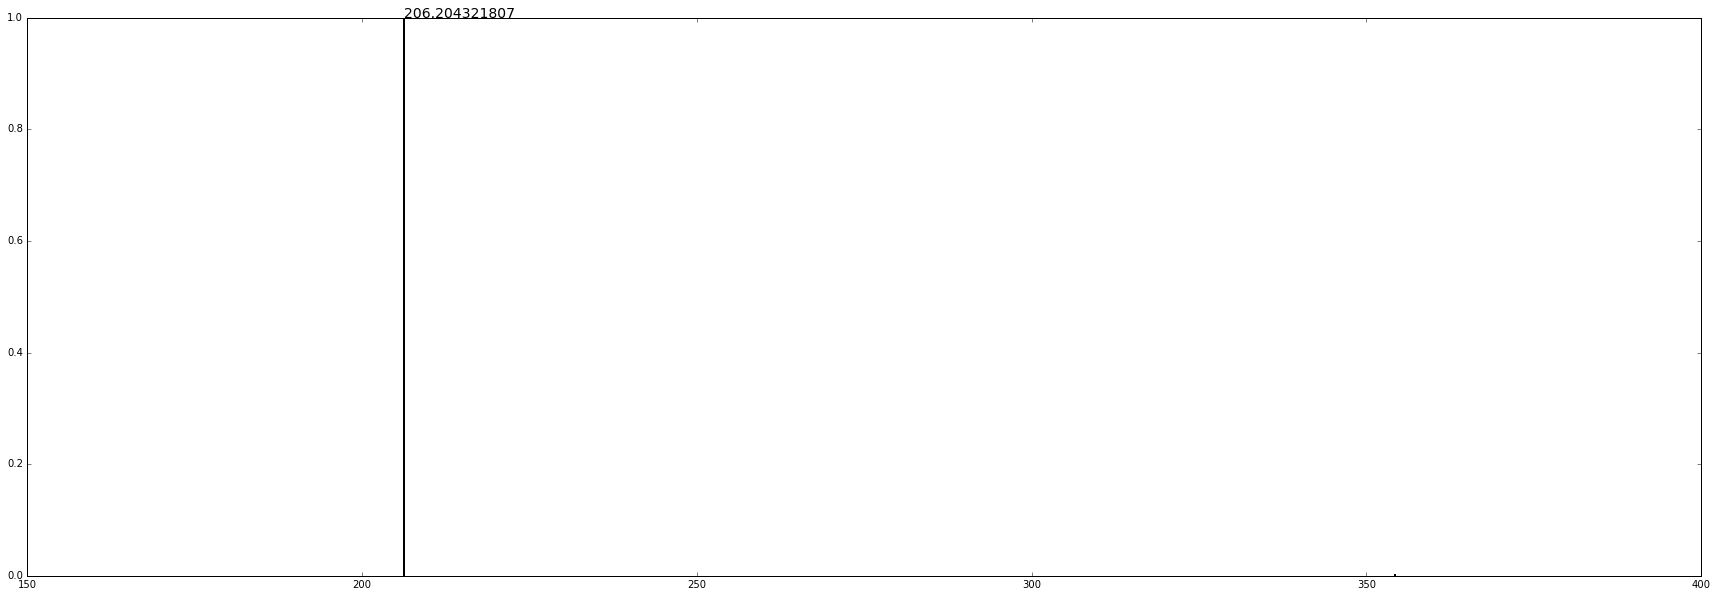

In [265]:
ig.plot(vals = v_lda.get_topic_as_doc_dict(41),figsize=(10,2),max_marker_size=30)
plt.savefig('topic41.png')
plot_topic_dict(v_lda.get_topic_as_dict(41),label_thresh=0.01)
plt.savefig('topic41_spectrum.png')
# plot_topic_dict(v_lda.get_topic_as_dict(19),label_thresh=0.01)


